<a href="https://colab.research.google.com/github/ahmadcah/ILTML/blob/main/Introduction_to_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Copyright 2019 Google LLC.

In [ ]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Introduction to scikit-learn

[Scikit-learn](https://scikit-learn.org) is a machine learning library in Python.

Scikit-learn is the first of the several machine learning libraries we will explore in this course. It is relatively approachable, supports a wide variety of traditional machine learning models, and is ubiquitous in the world of data science.

## Datasets

Scikit-learn contains methods for loading, fetching, and making (generating) data. The methods for doing this all fall under the [datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets) subpackage. Most of the functions in this package have `load`, `fetch`, or `make` in the name to let you know what the method is doing under the hood.

**Loading functions** bring static datasets into your program. The data comes pre-packaged with scikit-learn, so no network access is required.

**Fetching functions** also bring static datasets into your program. However, the data is pulled from the internet, so if you don't have network access, these functions might fail.

**Generating functions** make dynamic datasets based on some equation.

These pre-packaged dataset functions exist for many popular datasets, such as the [MNIST digits dataset](https://en.wikipedia.org/wiki/MNIST_database) and the [Iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set). The generation functions reference classic dataset "shape" formations such as [moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) and [swiss rolls](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_swiss_roll.html#sklearn.datasets.make_swiss_roll). These datasets are perfect for getting familiar with machine learning.

### Loading

Let us first look at an example of loading data. We will load the iris flowers dataset using the [load_iris](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris) function.

In [ ]:
from sklearn.datasets import load_iris

iris_data = load_iris()
iris_data

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

That's a lot to take in. Let's examine this loaded data a little more closely. First we'll see what data type this dataset is:

In [ ]:
type(iris_data)

sklearn.utils.Bunch

`sklearn.utils.Bunch` is a type that you'll see quite often when working with datasets built into scikit-learn. It is a dictionary-like container for feature and target data within a dataset.

You won't find much documentation about `Bunch` objects because they are not really meant for usage beyond containing data native to scikit-learn.

Let's look at the attributes of the iris dataset:

In [ ]:
dir(iris_data)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

`DESCR` is a description of the dataset.

In [ ]:
print(iris_data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

`filename` is the name of the source file where the data is stored.

In [ ]:
print(iris_data['filename'])

/usr/local/lib/python3.7/dist-packages/sklearn/datasets/data/iris.csv


`feature_names` is the name of the feature columns.

In [ ]:
print(iris_data['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


`target_names`, despite the name, is not the names of the target columns. There is only one column of targets.

Instead, `target_names` is the human-readable names of the classes in the target list within the bunch. In this case,`target_names` is the names of the three species of iris in this dataset.

In [ ]:
print(iris_data['target_names'])

['setosa' 'versicolor' 'virginica']


We can now examine `target` and see that it contains zeros, ones, and twos. These correspond to the target names 'setosa', 'versicolor', and 'virginica'.

In [ ]:
print(iris_data['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Last, we'll look at the `data` within the bunch. The data is an array of arrays. Each sub-array contains four values. These values match up with the `feature_names`. The first item in each sub-array is 'sepal length (cm)', the next is 'sepal width (cm)', and so on.

In [ ]:
iris_data['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

The number of target values should always equal the number of rows in the data.

In [ ]:
print(len(iris_data['data']))
print(len(iris_data['target']))

150
150


`Bunch` objects are an adequate container for data. They can be used directly to feed models. However, `Bunch` objects are *not* very good for analyzing and manipulating your data.

In this course, we will typically convert `Bunch` objects into Pandas `DataFrame` objects to make analysis, data cleaning, visualization, and train/test splitting easier.

To do this, we will take the matrix of feature data and append the target data to it to create a single matrix of data. We also take the list of feature names and append the word 'species' to represent the target classes in the matrix.

In [ ]:
import pandas as pd
import numpy as np

iris_df = pd.DataFrame(
  data=np.append(
    iris_data['data'], 
    np.array(iris_data['target']).reshape(len(iris_data['target']), 1), 
    axis=1),
  columns=np.append(iris_data['feature_names'], ['species'])
)

iris_df.sample(n=10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
61,5.9,3.0,4.2,1.5,1.0
128,6.4,2.8,5.6,2.1,2.0
53,5.5,2.3,4.0,1.3,1.0
137,6.4,3.1,5.5,1.8,2.0
17,5.1,3.5,1.4,0.3,0.0
38,4.4,3.0,1.3,0.2,0.0
10,5.4,3.7,1.5,0.2,0.0
95,5.7,3.0,4.2,1.2,1.0
28,5.2,3.4,1.4,0.2,0.0
45,4.8,3.0,1.4,0.3,0.0


You might notice that the integer representation of species got converted to a floating point number along the way. We can change that back.

In [ ]:
iris_df['species'] = iris_df['species'].astype('int64')

iris_df.sample(n=10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
12,4.8,3.0,1.4,0.1,0
4,5.0,3.6,1.4,0.2,0
80,5.5,2.4,3.8,1.1,1
21,5.1,3.7,1.5,0.4,0
10,5.4,3.7,1.5,0.2,0
110,6.5,3.2,5.1,2.0,2
60,5.0,2.0,3.5,1.0,1
41,4.5,2.3,1.3,0.3,0
89,5.5,2.5,4.0,1.3,1
47,4.6,3.2,1.4,0.2,0


### Exercise 1

Load the [Boston house price dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html) into a Pandas `DataFrame`. Append the target values to the last column of the `DataFrame` called `boston_df`. Name the target column 'PRICE'.

#### **Student Solution**

In [ ]:
# Your answer goes here
from sklearn.datasets import load_boston
boston_datasets = load_boston()
boston_df = pd.DataFrame(boston_datasets,columns=boston_datasets.target)
boston_df

,24.0,21.6,34.7,33.4,36.2,28.7,22.9,27.1,16.5,18.9,15.0,18.9,21.7,20.4,18.2,19.9,23.1,17.5,20.2,18.2,13.6,19.6,15.2,14.5,15.6,13.9,16.6,14.8,18.4,21.0,12.7,14.5,13.2,13.1,13.5,18.9,20.0,21.0,24.7,30.8,...,19.0,19.1,19.1,20.1,19.9,19.6,23.2,29.8,13.8,13.3,16.7,12.0,14.6,21.4,23.0,23.7,25.0,21.8,20.6,21.2,19.1,20.6,15.2,7.0,8.1,13.6,20.1,21.8,24.5,23.1,19.7,18.3,21.2,17.5,16.8,22.4,20.6,23.9,22.0,11.9


---

### Fetching

Fetching is similar to loading. Scikit-learn will first see if it can find the dataset locally, and, if so, it will simply load the data. Otherwise, it will attempt to pull the data from the internet.

We can see fetching in action with the [fetch_california_housing](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing) function below.

In [ ]:
from sklearn.datasets import fetch_california_housing

housing_data = fetch_california_housing()

type(housing_data)

sklearn.utils.Bunch

The dataset is once again a `Bunch`.

If you follow the link to the [fetch_california_housing](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing) documentation, you notice that the dataset is a **regression** dataset as opposed to the iris dataset, which was a **classification** dataset.

We can see the difference in the dataset by checking out the attributes of the `Bunch`.

In [ ]:
dir(housing_data)

['DESCR', 'data', 'feature_names', 'target']

We see that four of the attributes that we expect are present, but 'target_names' is missing. This is because our target is now a continuous variable (home price) and not a discrete value (iris species).

In [ ]:
print(housing_data['target'][:10])

[4.526 3.585 3.521 3.413 3.422 2.697 2.992 2.414 2.267 2.611]


Converting a `Bunch` of regression data to a `DataFrame` is no different than for a `Bunch` of classification data.

In [ ]:
import pandas as pd
import numpy as np

housing_df = pd.DataFrame(
  data=np.append(
    housing_data['data'], 
    np.array(housing_data['target']).reshape(len(housing_data['target']), 1), 
    axis=1),
  columns=np.append(housing_data['feature_names'], ['price'])
)

housing_df.sample(n=10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
1856,2.0074,20.0,5.284327,1.091540,1993.0,2.764216,41.75,-124.21,0.669
11722,4.9620,20.0,24.532895,4.039474,365.0,2.401316,39.24,-120.07,1.695
13249,2.5868,16.0,5.617414,1.108179,932.0,2.459103,34.11,-117.64,1.469
13098,4.3658,4.0,6.799093,1.099157,10329.0,3.347051,38.47,-121.40,1.306
12667,3.0625,12.0,5.351163,1.081395,2299.0,2.673256,38.48,-121.43,0.905
20346,3.1446,13.0,3.284815,1.039339,2257.0,1.775767,34.22,-119.06,1.771
8061,2.7813,35.0,5.074516,1.160954,1953.0,2.910581,33.84,-118.20,1.592
6432,4.5491,43.0,5.984848,1.045455,657.0,3.318182,34.12,-118.01,2.148
10690,2.3950,25.0,4.798722,1.146965,891.0,1.423323,33.61,-117.71,0.803
5026,2.8274,43.0,4.080734,1.009174,1598.0,2.932110,33.99,-118.33,1.225


### Generating

In the example datasets we've seen so far in this Colab, the data is static and loaded from a file. Sometimes it makes more sense to generate a dataset. For this, we can use one of the many [generator functions](https://scikit-learn.org/stable/modules/classes.html#samples-generator).

`make_regression` is a generator that creates a dataset with an underlying regression that you can then attempt to discover using various machine learning models.

In the example below, we create a dataset with 10 data points. For the sake of visualization, we have only one feature per datapoint, but we could ask for more.

The return values are the $X$ and $y$ values for the regression. $X$ is a matrix of features. $y$ is a list of targets.

Since a generator uses randomness to generate data, we are going to set a `random_state` in this Colab for reproducibility. This ensures we get the same result every time we run the code. **You won't do this in your production code.**

In [ ]:
from sklearn.datasets import make_regression

features, targets = make_regression(n_samples=10, n_features=1, random_state=42)

features, targets

(array([[ 1.57921282],
        [ 0.64768854],
        [-0.46947439],
        [ 0.76743473],
        [ 0.54256004],
        [-0.23413696],
        [-0.1382643 ],
        [ 1.52302986],
        [ 0.49671415],
        [-0.23415337]]),
 array([28.71403184, 11.77659472, -8.53621648, 13.95387945,  9.86509621,
        -4.25719445, -2.5139902 , 27.69248537,  9.03150346, -4.25749297]))

We can use a visualization library to plot the regression data.

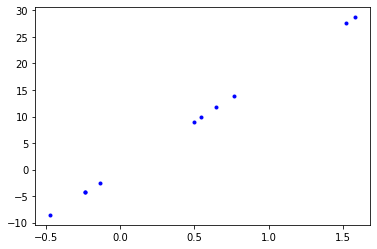

In [ ]:
import matplotlib.pyplot as plt

plt.plot(features, targets, 'b.')
plt.show()

That data appears to have a very linear pattern!

If we want to make it more realistic (non-linear), we can add some noise during data generation.

**Remember that random_state is for reproducibility only. Don't use this in your code unless you have a good reason to.**

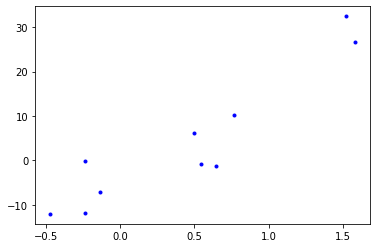

In [ ]:
from sklearn.datasets import make_regression

features, targets = make_regression(n_samples=10, n_features=1, random_state=42, noise=5.0)

plt.plot(features, targets, 'b.')
plt.show()

There are dozens of dataset loaders and generators in the scikit-learn [datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets) package. When you want to play with a new machine learning algorithm, they are a great source of data for getting started.

### Exercise 2

Search the [scikit-learn datasets documentation](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets) and find a function to make a "Moons" dataset. Create a dataset with 75 samples. Use a random state of 42 and a noise of 0.08. Store the $X$ return value in a variable called `features` and the $y$ return value in a variable called `targets`.

#### **Student Solution**

In [ ]:
# Your answer goes here
from sklearn.datasets import make_moons

features, targets = make_moons(n_samples=75,random_state=42,noise=0.08)

---

### Exercise 3

In Exercise Two, you created a "moons" dataset. In that dataset, the features are $(x,y)$-coordinates that can be graphed in a scatterplot. The targets are zeros and ones that represent a binary classification.

Use matplotlib's [scatter method](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html) to visualize the data as a scatterplot. Use the `c` argument to make the dots for each class a different color.

#### **Student Solution**

In [ ]:
# Your answer goes here
from matplotlib.colors import ListedColormap
markers = ('s','x','o','^','v')
colors = ('red','blue','green','gray','cyan','yellow','#00ff00')
cmap = ListedColormap(colors)

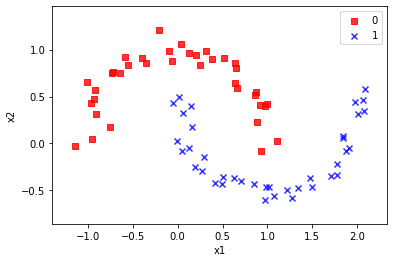

In [ ]:
delta = 0.25
x1_min, x1_max = features[:,0].min() - delta, features[:,0].max() + delta
x2_min, x2_max = features[:,1].min() - delta, features[:,1].max() + delta

plt.xlim(x1_min,x1_max)
plt.ylim(x2_min,x2_max)

for i, yval in enumerate(np.unique(targets)):
  plt.scatter(x=features[targets==yval,0], y=features[targets==yval,1], alpha=0.8,c=[cmap(i)],marker=markers[i],label=yval)

x1_label = 'x1'
x2_label = 'x2'
plt.xlabel(x1_label)
plt.ylabel(x2_label)
plt.legend(loc='upper right')
plt.show()

---

## Models



Machine learning involves training a model to gain insight and predictive power from a dataset. Scikit-learn has support for many different types of models, ranging from classic algebraic models to more modern deep learning models.

Throughout the remainder of this course, you will learn about many of these models in much more depth. This section will walk you through some of the overarching concepts across all models.

### Estimators

Most of the models in scikit-learn are considered [estimators](https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html#sklearn.base.BaseEstimator). An estimator is expected to implement two methods: `fit` and `predict`.

`fit` is used to train the model. At a minimum, it is passed the feature data used to train the model. In supervised models, it is also passed the target data.

`predict` is used to get predictions from the model. This method is passed features and returns target predictions.

Let's see an example of this in action.

Linear regression is a simple model that you might have encountered in a statistics class in the past. The model attempts to draw a straight line through a set of data points, so the line is as close to as many points as possible.

We'll use scikit-learn's [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) class to fit a line to the regression data that we generated earlier in this Colab. To do that, we simply call the `fit(features, targets)` method.

After fitting, we can ask the model for predictions. To do this, we use the `predict(features)` method.

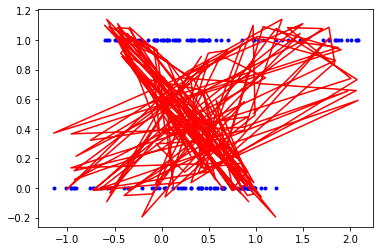

In [ ]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(features, targets)
predictions = regression.predict(features)

plt.plot(features, targets, 'b.')
plt.plot(features, predictions, 'r-')
plt.show()

At this point, don't worry too much about the details of what `LinearRegression` is doing. There is a deep-dive into regression problems coming up soon.

For now, just note the `fit`/`predict` pattern for training estimators, and know that you'll see it throughout our adventures with scikit-learn.

### Transformers

In practice, it is rare that you will get perfectly clean data that is ready to feed into your model for training. Most of the time, you will need to perform some type of cleaning on the data first.

You've had some hands-on experience doing this in our Pandas Colabs. Scikit-learn can also be used to perform some data preprocessing.

Transformers are spread about within the scikit-learn library. Some are in the [preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) module while others are in more specialized packages like [compose](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.compose), [feature_extraction](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_extraction), [impute](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.impute), and others.

All transformers implement the `fit` and `transform` methods. The `fit` method calculates parameters necessary to perform the data transformation. The `transform` method actually applies the transformation. There is a convenience `fit_transform` method that performs both fitting and transformation in one method call.

Let's see a transformer in action.

We will use the [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler) to scale our feature data between zero and one. This scales the data with a linear transform so that the minimum value becomes 0 and the maximum value becomes 1, so all values are within 0 and 1.

Looking at our feature data pre-transformation, we can see values that are below zero and above one.

In [ ]:
features

array([[ 0.97754808,  0.39475539],
       [ 1.78189288, -0.21831832],
       [ 0.65050093,  0.79957261],
       [ 0.92375778, -0.08382965],
       [-1.14624884, -0.02218683],
       [ 1.50110815, -0.46546351],
       [-0.72796104,  0.74708051],
       [ 0.51692696,  0.91378898],
       [ 1.83952168,  0.07913973],
       [ 1.77819003, -0.34058417],
       [-0.90880732,  0.3117695 ],
       [ 0.12540232, -0.04664424],
       [ 0.50184033, -0.35801865],
       [ 0.03742358,  1.05888979],
       [ 0.64473063,  0.63959507],
       [-0.35406285,  0.86244801],
       [ 0.91834691,  0.41354456],
       [-0.75524357,  0.17681177],
       [ 0.97987738, -0.46518352],
       [ 1.84785216,  0.05475808],
       [ 0.14421773,  0.39689783],
       [ 0.05571179,  0.31975237],
       [ 0.12482242,  0.95951448],
       [ 0.05289641, -0.07828259],
       [ 0.29897555, -0.14499539],
       [-0.92794884,  0.47121775],
       [ 0.8770787 ,  0.55311527],
       [ 1.27867297, -0.58246118],
       [ 0.26970088,

We will now create a `MinMaxScaler` and fit it to our feature data.

Each transformer has different information that it needs in order to perform a transformation. In the case of the `MinMaxScaler`, the smallest and largest values in the data are needed.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler()
transformer.fit(features)
transformer.data_min_, transformer.data_max_

(array([-1.14624884, -0.60601875]), array([2.08693816, 1.21081344]))

You might notice that the values are stored in arrays. This is because transformers can operate on more than one feature. In this case, however, we have only one.

Next, we need to apply the transformation to our features. After the transformation, we can now see that all of the features fall between the range of zero to one. Moreover, you might notice that the minimum and maximum value in the untransformed `features` array correspond to the 0 and 1 in the transformed array, respectively.

In [ ]:
features = transformer.transform(features)
features

array([[0.65687414, 0.55083466],
       [0.90565183, 0.21339364],
       [0.55572095, 0.77364952],
       [0.64023721, 0.28741735],
       [0.        , 0.32134609],
       [0.81880726, 0.07736281],
       [0.12937322, 0.74475742],
       [0.51440755, 0.83651519],
       [0.92347597, 0.37711709],
       [0.90450656, 0.14609746],
       [0.07343884, 0.50515851],
       [0.39331197, 0.30788452],
       [0.50974137, 0.13650137],
       [0.36610082, 0.91637992],
       [0.55393625, 0.68559652],
       [0.24501706, 0.80825668],
       [0.63856367, 0.56117638],
       [0.12093494, 0.43087662],
       [0.65759457, 0.07751691],
       [0.92605253, 0.36369723],
       [0.39913144, 0.55201387],
       [0.37175723, 0.50955235],
       [0.39313261, 0.8616829 ],
       [0.37088645, 0.2904705 ],
       [0.44699684, 0.2537512 ],
       [0.06751852, 0.59292019],
       [0.62579973, 0.63799729],
       [0.75000976, 0.01296629],
       [0.43794241, 0.17327686],
       [0.04179931, 0.69578803],
       [0.

### Pipelines

A [pipeline](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.pipeline) is simply a series of transformers, often with an estimator at the end.

In the example below, we use a [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) class to perform min-max scaling or our feature data and then train a linear regression model using the scaled features.

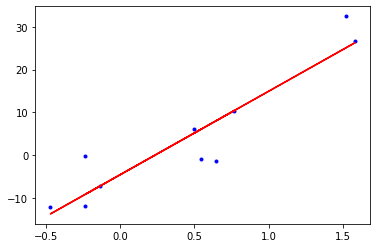

In [ ]:
from sklearn.pipeline import Pipeline

features, targets = make_regression(
    n_samples=10, n_features=1, random_state=42, noise=5.0)

pipeline = Pipeline([
  ('scale', MinMaxScaler()),
  ('regression', LinearRegression())
])

pipeline.fit(features, targets)

predictions = pipeline.predict(features)

plt.plot(features, targets, 'b.')
plt.plot(features, predictions, 'r-')
plt.show()

### Metrics

So far we have seen ways that scikit-learn can help you get data, modify that data, train a model, and finally, make predictions. But how do we know how good these predictions are?

Scikit-learn also comes with many functions for measuring model performance in the [metrics](https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) package. Later in this course, you will learn about different ways to measure the performance of regression and classification models, as well as tradeoffs between the different metrics.

We can use the [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) function to find the mean squared error (MSE) between the target values that we used to train our linear regression model and the predicted values.

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(targets, predictions)

27.955458970333645

In this case, the MSE value alone doesn't have much meaning. Since the data that we fit the regression to isn't related to any real-world metrics, the MSE is hard to interpret alone.

As we learn more about machine learning and begin training models on real data, you'll learn how to interpret MSE and other metrics in the context of the data being analyzed and the problem being solved.

There are also metrics that come with each estimator class. These metrics can be extracted using the `score` method.

The `regression` class we created earlier can be scored, as can the `pipeline`.

In [ ]:
print(regression.score(features, targets))
print(pipeline.score(features, targets))

ValueError: ignored

The return value of the `score` method depends on the estimator being used. In the case of `LinearRegression`, the score is the $R^2$ score, where scores closer to 1.0 are better. You can find the metric that `score` returns in the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score) for the given estimator you're using.

### Exercise 4

Use the [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) class to combine a data pre-processor and an estimator.

To accomplish this:

1. Find a [preprocessor](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) that uses the max absolute value for scaling.
1. Find a [linear_model](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model) based on the Huber algorithm.
1. Combine this preprocessor and estimator into a pipeline.
1. Make a sample regression dataset with 200 samples and 1 feature. Use a random state of 85 and a noise of 5.0. Save the features in a variable called `features` and the targets in a variable called `targets`.
1. Fit the model.
1. Using the features that were created when the regression dataset was created, make predictions with the model and save them into a variable called `predictions`.
1. Plot the features and targets used to train the model on a scatterplot with blue dots.
1. Plot the features and predictions over the scatterplot as a red line.

#### **Student Solution**

In [ ]:
# Your answer goes here

---

## Conclusion

Scikit-learn is a widely used library that contains scores of resources for performing machine learning. In this Colab, we have introduced some basic concepts that you will see repeated throughout your career in data science. We will cover other parts of scikit-learn later in the course.

You are also encouraged to check out the [scikit-learn documentation](https://scikit-learn.org/stable/documentation.html), where you will find a user guide, tutorials, and a full API reference.

Scikit-learn is an open source project. You can find it [on Github here](https://github.com/scikit-learn/scikit-learn).

## Resources

* https://scikit-learn.org/stable/documentation.html
* https://en.wikipedia.org/wiki/Scikit-learn
* https://en.wikipedia.org/wiki/Estimator
* https://en.wikipedia.org/wiki/Mean_squared_error
* https://github.com/scikit-learn/scikit-learn